# Описание проекта

>Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

>Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

>В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

# Описание данных

>- **Name** — название игры
- **Platform** — платформа
- **Year_of_Release** — год выпуска
- **Genre** — жанр игры
- **NA_sales** — продажи в Северной Америке (миллионы проданных копий)
- **EU_sales** — продажи в Европе (миллионы проданных копий)
- **JP_sales** — продажи в Японии (миллионы проданных копий)
- **Other_sales** — продажи в других странах (миллионы проданных копий)
- **Critic_Score** — оценка критиков (максимум 100)
- **User_Score** — оценка пользователей (максимум 10)
- **Rating** — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

> *Данные за 2016 год могут быть неполными*

# Оглавление

- [Открытие данных](#id-open) 
- [Подготовка данных](#id-dataprep) 
- [Исследовательский анализ](#id-analysis) 
- [Портрет региона](#id-region)
- [Проверка гипотез](#id-hypothesis)
- [Вывод](#id-conclusion)

# Шаг 1. Открытие файла и изучение информации<a id="id-open"></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from scipy import stats as st
import math
from scipy.stats import bartlett

In [2]:
df = pd.read_csv("/datasets/games.csv")

In [3]:
df.sample(5)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
16287,Metal Slug Anthology,PS2,2007.0,Shooter,0.00,0.00,0.01,0.00,80.0,8.1,T
4024,Dragon Ball Z: Supersonic Warriors 2,DS,2005.0,Fighting,0.13,0.02,0.32,0.02,66.0,7.6,E10+
12943,Medabots: Infinity,GC,2003.0,Role-Playing,0.04,0.01,0.00,0.00,51.0,8,E
122,FIFA 12,PS3,2011.0,Sports,0.84,4.30,0.11,1.39,NaN,NaN,NaN
9208,The Darkness II,PC,2012.0,Shooter,0.10,0.03,0.00,0.01,77.0,7.6,M


In [4]:
df.shape

(16715, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year_of_Release,16446.0,2006.484616,5.877050,1980.0,2003.0,2007.00,2010.00,2016.00
NA_sales,16715.0,0.263377,0.813604,0.0,0.0,0.08,0.24,41.36
EU_sales,16715.0,0.145060,0.503339,0.0,0.0,0.02,0.11,28.96
JP_sales,16715.0,0.077617,0.308853,0.0,0.0,0.00,0.04,10.22
Other_sales,16715.0,0.047342,0.186731,0.0,0.0,0.01,0.03,10.57
Critic_Score,8137.0,68.967679,13.938165,13.0,60.0,71.00,79.00,98.00


In [7]:
df.isna().mean()[df.isna().mean() * 100 != 0] * 100

Name                0.011965
Year_of_Release     1.609333
Genre               0.011965
Critic_Score       51.319174
User_Score         40.089740
Rating             40.478612
dtype: float64

In [8]:
df["Year_of_Release"].value_counts()

2008.0    1427
2009.0    1426
2010.0    1255
2007.0    1197
2011.0    1136
2006.0    1006
2005.0     939
2002.0     829
2003.0     775
2004.0     762
2012.0     653
2015.0     606
2014.0     581
2013.0     544
2016.0     502
2001.0     482
1998.0     379
2000.0     350
1999.0     338
1997.0     289
1996.0     263
1995.0     219
1994.0     121
1993.0      62
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1989.0      17
1983.0      17
1990.0      16
1987.0      16
1988.0      15
1985.0      14
1984.0      14
1980.0       9
Name: Year_of_Release, dtype: int64

# Вывод

Первый взгляд на исходные данные показал следующее:
- 1 таблица, 16715 наблюдений, 11 переменных;
- Надо решить, что делать с нулевыми значениями, в некоторых колонках их более 40%, + в колонке User_Score есть значения tbd (to be defined?) - надо заменить эти значения, например, 0, чтобы поменять тип колонки на float;
- Во всех колонках с признаком sales 3-й квартиль сильно отличается от максимального значения - есть выбросы (про выбросы говорит и то, что среднее сильно отличается от медианы, среднее стремится в сторону выброса, соответственно у нас выбросы с правой стороны - со стороны максимума).

# Шаг 2. Подготовка данных<a id="id-dataprep"></a>

>1. Замените названия столбцов (приведите к нижнему регистру);
2. Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему;
3. Обработайте пропуски при необходимости:
    - Объясните, почему заполнили пропуски определённым образом или почему не стали это делать;
    - Опишите причины, которые могли привести к пропускам;
    - Обратите внимание на аббревиатуру 'tbd' в столбцах с рейтингом. Отдельно разберите это значение и опишите, как его обработать;
4. Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.

In [9]:
df.columns = df.columns.str.lower()

In [10]:
df.isna().mean()[df.isna().mean() * 100 != 0] * 100

name                0.011965
year_of_release     1.609333
genre               0.011965
critic_score       51.319174
user_score         40.089740
rating             40.478612
dtype: float64

Перед заменой типов данных решим, что делать с пустыми значениями:

**genre,  name** - пустых значений меньше 0.01% (2 наблюдения), причем в этих наблюдениях также отсутствует информация в колонках critic_score, user_score, rating. Так что удалив эти строки мы не потеряем много информации и не исказим общую картину.\
**year_of_release** - значений Na 1.6% (269 наблюдений), если бы значений было не так много, можно было бы найти информацию в интернете, но найти год выпуска для 269 - задача трудоемкая, поэтому не будем обрабатывать Na в данном случае. \
**critic_score** - значений Na больше 50% - не будем их никак обрабатывать, чтобы не терять информацию\искажать общую картину. \
**user_score** - заменим tbd (to be defiend) на Na (я считаю, что в данном случае значение tbd означение отсутствие значения), чтобы в последующем изменить тип данных на float.\
**rating** - заменим Na на TBD и будем иметь в виду, что под этим значением подразумевается Na.

Причина появления нулевых значений - технический сбой либо исторические данные не дошли до нас.

In [11]:
df = df[df["genre"].notna()]

In [12]:
df["user_score"] = df["user_score"].replace("tbd", np.nan)

In [13]:
df["rating"] = df["rating"].replace(np.nan, "TBD")

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16713 non-null object
year_of_release    16444 non-null float64
genre              16713 non-null object
na_sales           16713 non-null float64
eu_sales           16713 non-null float64
jp_sales           16713 non-null float64
other_sales        16713 non-null float64
critic_score       8137 non-null float64
user_score         7590 non-null object
rating             16713 non-null object
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


Приведем данные к более точным типам.

In [15]:
df = df.astype({"user_score":"float"})

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16713 non-null object
year_of_release    16444 non-null float64
genre              16713 non-null object
na_sales           16713 non-null float64
eu_sales           16713 non-null float64
jp_sales           16713 non-null float64
other_sales        16713 non-null float64
critic_score       8137 non-null float64
user_score         7590 non-null float64
rating             16713 non-null object
dtypes: float64(7), object(4)
memory usage: 1.5+ MB


Посчитаем суммарные продажи во всех регионах.

In [17]:
df["sum_sales"] = df["na_sales"] + df["eu_sales"] + df["jp_sales"] + df["other_sales"]

# Вывод

На данном этапе:
- Понизили регистр заголовков таблицы;
- Обработали нулевые значения различными способами в зависимости от типа данных;
- Изменили типы данных;
- Посчитали суммарные продажи во всех регионах.

Можно приступать к следующему шагу.

# Шаг 3. Исследовательский анализ данных<a id="id-analysis"></a>

>- Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
- Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
- Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
- Не учитывайте в работе данные за предыдущие годы.
- Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.
- Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.
- Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.
- Соотнесите выводы с продажами игр на других платформах.
- Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

>- Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

In [18]:
year_pivot = df.pivot_table(index = "year_of_release", values = "name", aggfunc='count')

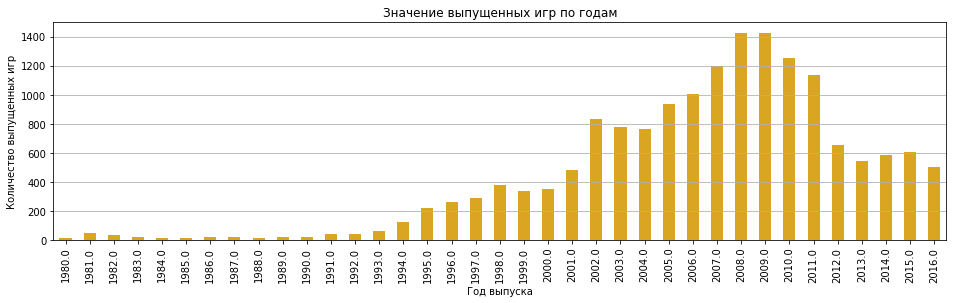

In [19]:
year_pivot.plot(kind="bar", figsize=(16, 4), facecolor='goldenrod')
plt.title("Значение выпущенных игр по годам")
plt.xlabel("Год выпуска")
plt.ylabel("Количество выпущенных игр")
plt.legend().remove()
plt.grid(True, axis="y")
plt.show()

In [20]:
year_pivot[year_pivot.index <= 1993]["name"].sum()/year_pivot["name"].sum() * 100

2.219654585259061

C 1980 по 1993 было выпущено около 2% игр. Видимо в это время сфера игровых платформ только зарождалась. После 1993 начался рост количества выпускаемых игр. Данные с 1980 по 1993 год можно объединить в одну категорию.

In [21]:
def year_categ(row):
    if row <= 1993:
        return 1993
    return row

In [22]:
year_pivot = year_pivot.reset_index()

In [23]:
year_pivot["year_cat"] = year_pivot["year_of_release"].apply(year_categ)

In [24]:
year_pivot_grouped = year_pivot.pivot_table(index = "year_cat", values = "name", aggfunc='sum')

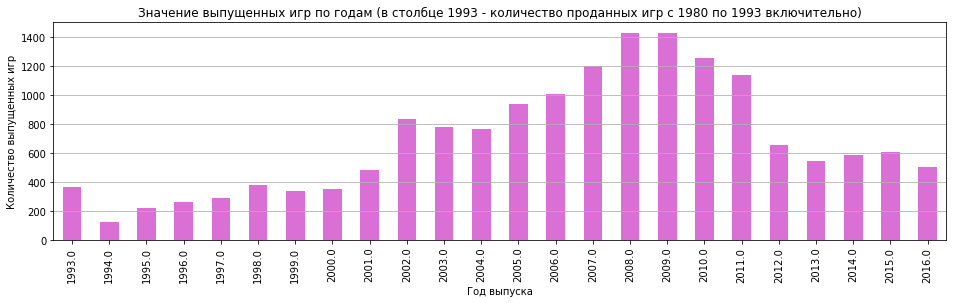

In [25]:
year_pivot_grouped.plot(kind="bar", figsize=(16, 4), facecolor='orchid')
plt.title("Значение выпущенных игр по годам (в столбце 1993 - количество проданных игр с 1980 по 1993 включительно)")
plt.xlabel("Год выпуска")
plt.ylabel("Количество выпущенных игр")
plt.legend().remove()
plt.grid(True, axis="y")
plt.show()

Пик количества выпускаемых игр пришелся на 2007-2008 г. Дальше количество выпускаемых игр снижалось и в 2013 году вышло на плато с небольшими колебаниями. С 2012 по 2016 год выпускалось примерно одинаковое количество игр каждый год. Посмотрим в табличной форме:

In [26]:
year_pivot[year_pivot["year_of_release"] >= 2012][["year_of_release", "name"]]

,year_of_release,name
32,2012.0,653
33,2013.0,544
34,2014.0,581
35,2015.0,606
36,2016.0,502


>- Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?


In [27]:
platform_pivot = df.pivot_table(index = "platform", values = "sum_sales", aggfunc='sum').sort_values(by="sum_sales")

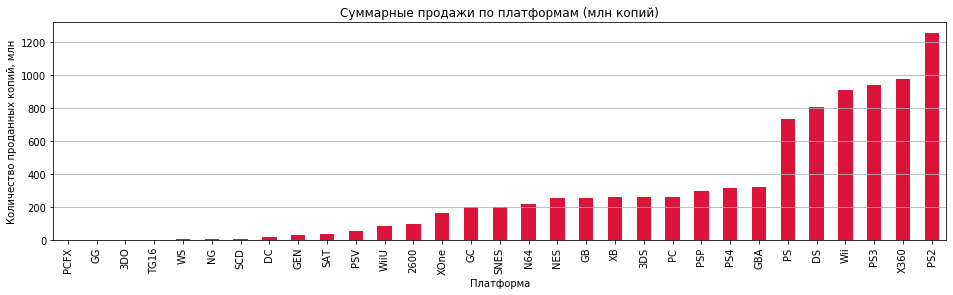

In [28]:
platform_pivot.plot(kind="bar", figsize=(16, 4), facecolor='crimson')
plt.title("Суммарные продажи по платформам (млн копий)")
plt.xlabel("Платформа")
plt.ylabel("Количество проданных копий, млн")
plt.legend().remove()
plt.grid(True, axis="y")
plt.show()

Судя по столбчатой диаграмме можно выделить топ 6 платформ по суммарным продажам за период с 1980 по 2016 год. Так и сделаем.

In [29]:
top6_names = pd.Series(platform_pivot.sort_values(by="sum_sales", ascending=False)[:6].index.tolist())

In [30]:
df_top6 = df[df["platform"].isin(top6_names)][["platform", "year_of_release", "sum_sales"]]

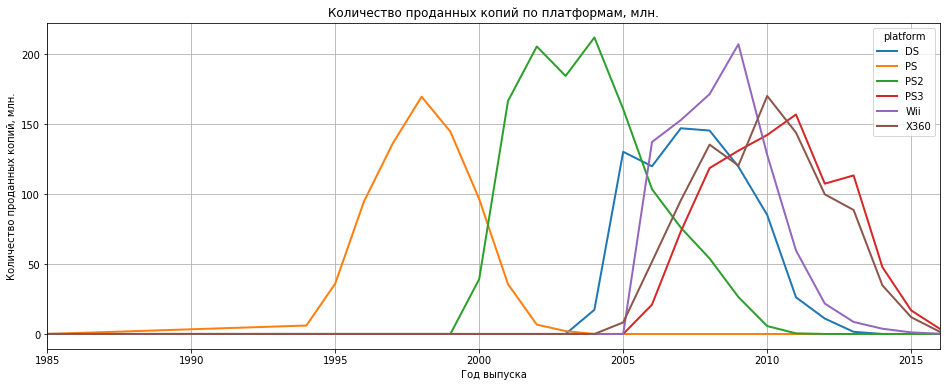

In [31]:
df_top6.pivot_table(index='year_of_release', columns='platform', values='sum_sales', aggfunc=sum).\
                    fillna(0).plot(figsize=(16, 6), linewidth=2)
plt.title("Количество проданных копий по платформам, млн.")
plt.xlabel("Год выпуска")
plt.ylabel("Количество проданных копий, млн.")
plt.grid(True)
plt.show()


Судя по диаграмме жизненный цикл платформ - 10-12 лет.

**DS** - 2003 - 20013 -10 лет\
**PS** - 1994 - 2004 - 10 лет \
**PS2** - 1999 - 2011 - 12 лет \
**PS3** - 2005 - 2016 - 11 лет\
**WII** - 2004 - 2015 - 11 лет\
**X360** - 2004 - 2016 - 12 лет

>- Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.

Исходя из столбчатой диаграммы, которую построили на первом этапе, с 2012 по 2016 год выпускалось примерно одинаковое количество игр каждый год, предположу, что тенденция сохранится и буду использовать период 2012-2016 для предсказания будущих периодов.

>- Не учитывайте в работе данные за предыдущие годы.

Для того, чтобы не учитывать в работе данные за предыдущие годы, отфильтруем только нужную информацию.

In [32]:
df_historical = df[df["year_of_release"] >= 2012]

>- Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.

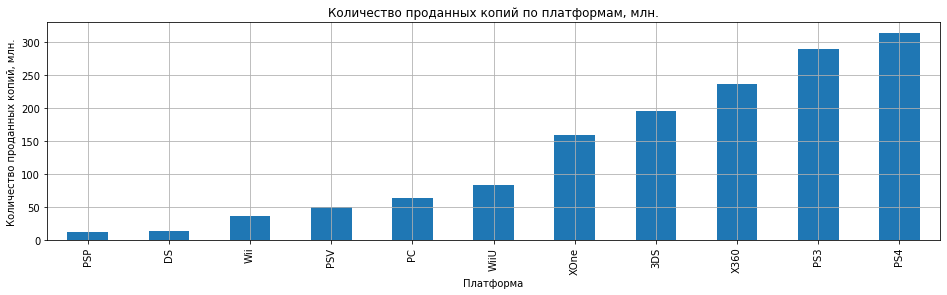

In [33]:
df_historical.pivot_table(index="platform", values='sum_sales', aggfunc=sum).query("sum_sales != 0")\
    .sort_values(by="sum_sales").plot(kind="bar", figsize=(16, 4), linewidth=2)
plt.title("Количество проданных копий по платформам, млн.")
plt.xlabel("Платформа")
plt.ylabel("Количество проданных копий, млн.")
plt.legend().remove()
plt.grid(True)
plt.show()

Исходя из столбчатой диаграммы выделим топ 5 платформ, которые приносят наибольшую прибыль и по ним посмотрим динамику по годам.

In [34]:
platforms_profit = pd.Series(df_historical.pivot_table(index="platform", values='sum_sales', 
                aggfunc=sum).sort_values(by="sum_sales", ascending=False)[:5].index.tolist())

In [35]:
df_profit = df_historical[df_historical["platform"].isin(platforms_profit)][["platform", "year_of_release", "sum_sales"]]

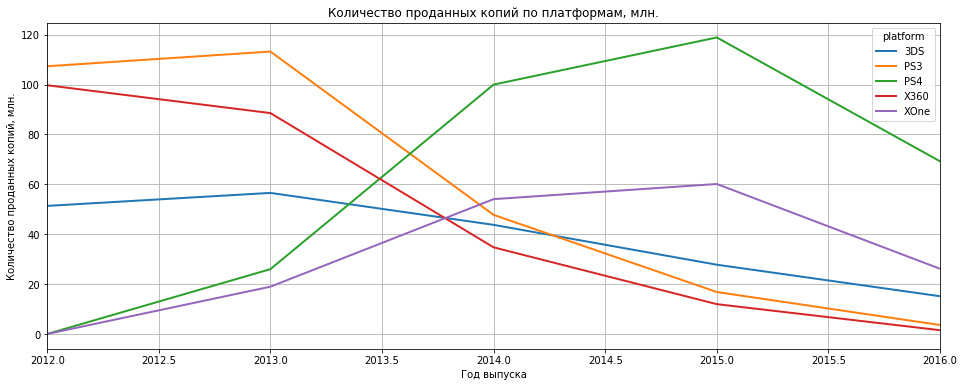

In [36]:
df_profit.pivot_table(index='year_of_release', columns='platform', values='sum_sales', aggfunc=sum).\
                    fillna(0).plot(figsize=(16, 6), linewidth=2)
plt.title("Количество проданных копий по платформам, млн.")
plt.xlabel("Год выпуска")
plt.ylabel("Количество проданных копий, млн.")
plt.grid(True)
plt.show()

У лидеров продаж в целом наблюдается тенденция к снижению продаж количества копий игр в с течение времени. Возможно, за 2016 год собраны не все данные, поэтому может искажаться динамика. Если не смотреть на 2016 год, потенциально прибыльными платформами будут PS4 и XOne. Исключим лидеров продаж из набора данных и посмотрим, есть ли потенциально прибыльные платформы среди остальных платформ.

In [37]:
df_promising = df_historical[~df_historical["platform"].isin(platforms_profit)][["platform", "year_of_release", "sum_sales"]]

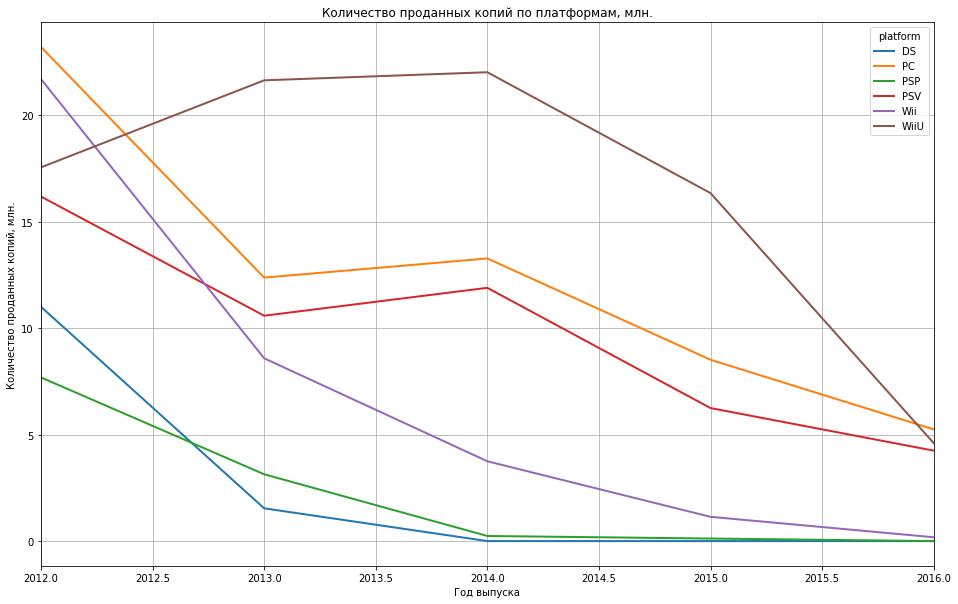

In [38]:
df_promising.pivot_table(index='year_of_release', columns='platform', values='sum_sales', aggfunc=sum).\
                    fillna(0).plot(figsize=(16, 10), linewidth=2)
plt.title("Количество проданных копий по платформам, млн.")
plt.xlabel("Год выпуска")
plt.ylabel("Количество проданных копий, млн.")
plt.grid(True)
plt.show()

Ни по одной из платформа не наблюдается рост по продажам. Здесь не выделю ни одну платформу, как потенциально прибыльную.

> - Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.

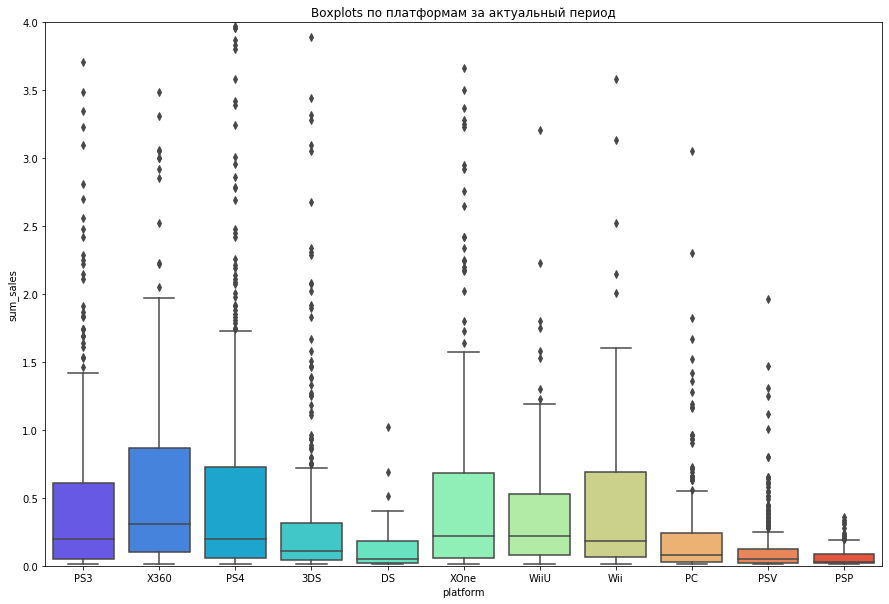

In [39]:
plt.figure(figsize=(15, 10))
ax = sns.boxplot(x="platform", y="sum_sales", data=df_historical, palette='rainbow')
ax.set_title("Boxplots по платформам за актуальный период")
ax.set_ylim([0,4]);

Медиана продажи игр на всех платформах за указанный актуальный период не превышает 0.3 млн копий, 3-й квартиль - не превышает 0.9 млн копий. Вариативность данных по различным платформам различается. У наиболее известных платформ вариативность данных выше, чем у менее известных. Например, у PS4 есть очень успешные игры с продажами свыше 4 млн копий, так и не очень успешные игры, с продажами менее 0.1 млн копий. У менее известных платформ таких как DS, PSV, PSP вариативность данных ниже, у них продажи колеблются в более узком диапазоне. Это можно объяснить тем, что более известная платформа выпускает больше игр в целом и есть больше вероятность, что игра выстрелит (закон больших чисел:)

>- Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.

In [40]:
pf_platform_pop = df_historical[df_historical["platform"]=="PS4"]

In [41]:
pf_platform_pop[["critic_score", "user_score", "sum_sales"]].corr()["sum_sales"]

critic_score    0.406568
user_score     -0.031957
sum_sales       1.000000
Name: sum_sales, dtype: float64

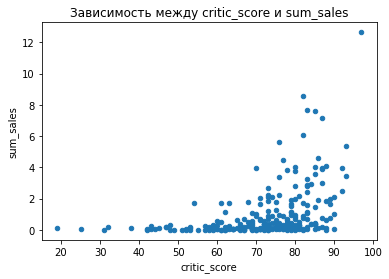

In [42]:
ax = pf_platform_pop.plot(x='critic_score', y='sum_sales', kind="scatter") 
ax.set_title("Зависимость между critic_score и sum_sales")
ax.set_xlabel("critic_score")
ax.set_ylabel("sum_sales");

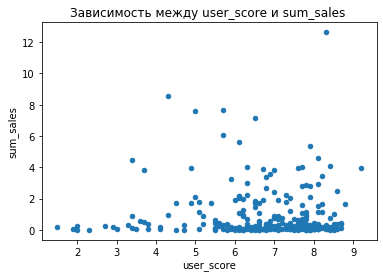

In [43]:
ax = pf_platform_pop.plot(x='user_score', y='sum_sales', kind="scatter") 
ax.set_title("Зависимость между user_score и sum_sales ")
ax.set_xlabel("user_score")
ax.set_ylabel("sum_sales");

Коэффициент корреляции между sum_sales и user_score у PS4 практически равен нулю, значительной зависимости в данном случае нет.
Коэффициент корреляции между sum_sales и critic_score у PS4 положительная и равна 0.4. Это значит, что существует линейная зависимость между critic_score и sum_sales - с ростом одного показателя растет второй, но значение 0.4 - относится к слабой корреляции, поэтому можно не брать ее в расчет.

>- Соотнесите выводы с продажами игр на других платформах.


In [44]:
pf_platform_other = df_historical[df_historical["platform"]!="PS4"]

In [45]:
pf_platform_other[["critic_score", "user_score", "sum_sales"]].corr()["sum_sales"]

critic_score    0.284773
user_score      0.009513
sum_sales       1.000000
Name: sum_sales, dtype: float64

Если взять продажи по всем остальным платформам вывод сохранится - корреляция слабая, не будем ее учитывать.

> - Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

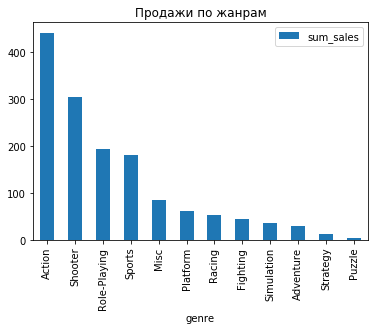

In [46]:
ax = df_historical.pivot_table(index="genre", values="sum_sales", aggfunc="sum").sort_values(by="sum_sales", ascending=False).\
plot(kind="bar")
ax.set_title("Продажи по жанрам");

Да, выделяются жанры с высокими и низкими продажами. Самые высокие продажи у жанра action, shooter, role-playing, sports. Самые низки - strategy, puzzle. Видимо, пользователи не очень любят игры, в которых надо думать, а любят экшн, что логично, люди играют в игры, чтобы отвлечься и расслабиться.

# Вывод

На данном этапе я провела исследовательский анализ данных:
- Увидела, что не все годы важны для формирования общей картины – 1980 по 1993 было выпущено всего 2% игр, эти данные я сгруппировала в одну категорию.
- Определила характерный жизненный цикл платформ – 10-12 лет.
- Определила актуальный период для прогноза на 2017 год – 2012-2016 год.
- Выделила потенциально прибыльные платформы – PS4 и XOne.
- На боксплотах выявила, что у наиболее известных платформ вариативность данных выше, чем у менее известных. 
- Рассчитала коэффициент корреляции между sum_sales и user_score, critic_score отдельно по PS4 и остальным платформам и сделала вывод, что корреляция слабая, ее можно не учитывать.
- Увидела, что различные жанры продаются по-разному. Людей больше интересует экшн и шутеры. В меньше степени им интересно играть в интеллектуальные игры.

# Шаг 4. Портрет пользователя каждого региона<a id="id-region"></a>

>Определите для пользователя каждого региона (NA, EU, JP):
- Самые популярные платформы (топ-5). Опишите различия в долях продаж.
- Самые популярные жанры (топ-5). Поясните разницу.
- Влияет ли рейтинг ESRB на продажи в отдельном регионе?

>Определите для пользователя каждого региона (NA, EU, JP):
- Самые популярные платформы (топ-5). Опишите различия в долях продаж.

In [47]:
eu_sales = df_historical.pivot_table(index="platform", values="eu_sales", aggfunc="sum").\
sort_values("eu_sales", ascending=False)[:5]

In [48]:
eu_sales["eu_sales_prop"] = eu_sales["eu_sales"]/df_historical["eu_sales"].sum()*100

In [49]:
eu_sales

,eu_sales,eu_sales_prop
platform,,
PS4,141.09,27.838286
PS3,106.86,21.084409
X360,74.52,14.703445
XOne,51.59,10.179156
3DS,42.64,8.413243


In [50]:
jp_sales = df_historical.pivot_table(index="platform", values="jp_sales", aggfunc="sum").\
sort_values("jp_sales", ascending=False)[:5]

In [51]:
jp_sales["jp_sales_prop"] = jp_sales["jp_sales"]/df_historical["jp_sales"].sum()*100

In [52]:
jp_sales

,jp_sales,jp_sales_prop
platform,,
3DS,87.79,45.586250
PS3,35.29,18.324852
PSV,21.04,10.925330
PS4,15.96,8.287465
WiiU,13.01,6.755634


In [53]:
na_sales = df_historical.pivot_table(index="platform", values="na_sales", aggfunc="sum").\
sort_values("na_sales", ascending=False)[:5]

In [54]:
na_sales["na_sales_prop"] = na_sales["na_sales"]/df_historical["na_sales"].sum()*100

In [55]:
na_sales

,na_sales,na_sales_prop
platform,,
X360,140.05,23.698326
PS4,108.74,18.400257
PS3,103.38,17.493274
XOne,93.12,15.757145
3DS,55.31,9.359189


- Самые популярные платформы в 3-х регионах различаются.
- PS3 и PS4 входят в топ 5 в 3 регионах. 
- В Европе самая популярная платформа PS4 - доля продаж игр среди всех продаж за актуальный период составляет 27.8%\
- В Японии 3DS - 45.6%
- В Северной Америке X360 - 23.7%.

>Определите для пользователя каждого региона (NA, EU, JP):
- Самые популярные жанры (топ-5). Поясните разницу.

In [56]:
eu_genres = df_historical.pivot_table(index="genre", values="eu_sales", aggfunc="sum").\
sort_values("eu_sales", ascending=False)[:5]

In [57]:
eu_genres["eu_prop"] = eu_genres["eu_sales"]/df_historical["sum_sales"].sum()*100

In [58]:
eu_genres

,eu_sales,eu_prop
genre,,
Action,159.34,11.015326
Shooter,113.47,7.844289
Sports,69.09,4.776258
Role-Playing,48.53,3.354925
Racing,27.29,1.886584


In [59]:
na_genres = df_historical.pivot_table(index="genre", values="na_sales", aggfunc="sum").\
sort_values("na_sales", ascending=False)[:5]

In [60]:
na_genres["na_prop"] = na_genres["na_sales"]/df_historical["sum_sales"].sum()*100

In [61]:
na_genres

,na_sales,na_prop
genre,,
Action,177.84,12.294249
Shooter,144.77,10.008088
Sports,81.53,5.636247
Role-Playing,64.00,4.424381
Misc,38.19,2.640111


In [62]:
jp_genres = df_historical.pivot_table(index="genre", values="jp_sales", aggfunc="sum").\
sort_values("jp_sales", ascending=False)[:5]

In [63]:
jp_genres["jp_prop"] = jp_genres["jp_sales"]/df_historical["sum_sales"].sum()*100

In [64]:
jp_genres

,jp_sales,jp_prop
genre,,
Role-Playing,65.44,4.523930
Action,52.80,3.650114
Misc,12.86,0.889024
Simulation,10.41,0.719653
Fighting,9.44,0.652596


В Северной Америке и Европе картина по самым популярным жанрам игр схожа - топ4 позиции совпадают: Action, Shooter, Sports, Role-Playing. Это может быть обусловлено схожестью культур. В Японии ситуация отличается - самый популярный жанр - Role-Playing и за ним идет самый популярный в Северной Америке и Европе жанр Action. Япония - отдельная вселенная и культура Японии не похожа на культуру Западного мира, соответственно вкусовые предпочтения пользователей в Японии формируются по своим законам.

>- Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [65]:
eu_rating = df_historical.pivot_table(index="rating", values="eu_sales", aggfunc="sum").\
sort_values("eu_sales", ascending=False).reset_index()

In [66]:
jp_rating = df_historical.pivot_table(index="rating", values=["jp_sales", "eu_sales", "na_sales"], aggfunc="sum").\
sort_values("jp_sales", ascending=False).reset_index()

In [67]:
na_rating = df_historical.pivot_table(index="rating", values="na_sales", aggfunc="sum").\
sort_values("na_sales", ascending=False).reset_index()

In [68]:
eu_na = eu_rating.merge(na_rating)

In [69]:
full = eu_na.merge(jp_rating)

In [70]:
full

,rating,eu_sales,na_sales,jp_sales
0,M,193.96,231.57,21.20
1,E,113.03,114.37,28.33
2,TBD,91.50,103.31,108.84
3,E10+,55.37,75.70,8.19
4,T,52.96,66.02,26.02


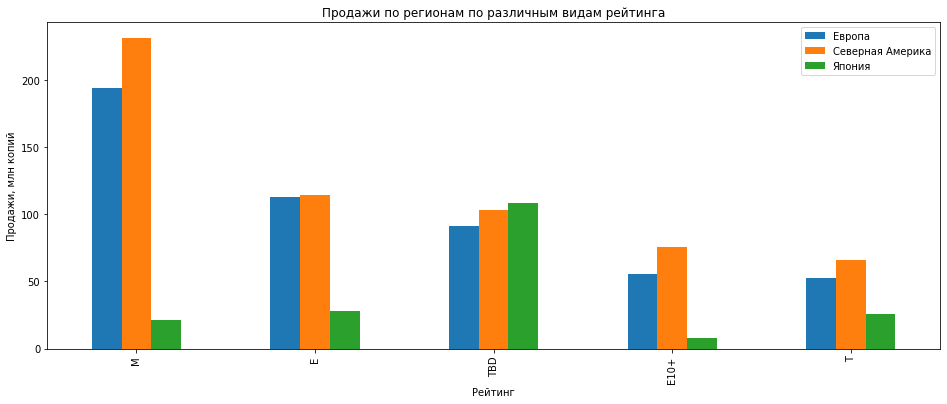

In [71]:
ax = full.set_index("rating").plot(figsize=(16, 6), kind="bar")
ax.set_title("Продажи по регионам по различным видам рейтинга")
ax.set_xlabel("Рейтинг")
ax.set_ylabel("Продажи, млн копий")
ax.legend(["Европа", "Северная Америка", "Япония"]);

Рейтинг ESRB влияет на продажи в каждом из регионов.
В Европе и Северной Америке самые продаваемые игры - для взрослых. В Японии самые продаваемые игры для всех и игры для подростков. По Японии сложно сделать однозначный вывод, потому что большая часть данных пропущена.

# Вывод

На данном этапе я определила портрет пользователя каждого региона:
- Самые популярные платформы в 3-х регионах различаются:
    - В Европе самая популярная платформа PS4 - доля продаж игр среди всех продаж за актуальный период составляет 27.8%
    - В Японии 3DS - 45.6%
    - В Северной Америке X360 - 23.7%.
- Картина по самым популярным жанрам очень схожа в Северной Америке и Европе - топ4 позиции совпадают: Action, Shooter, Sports, Role-Playing. В Японии ситуация отличается - самый популярный жанр - Role-Playing и за ним идет самый популярный в Северной Америке и Европе жанр Action.
- Рейтинг ESRB влияет на продажи в каждом из регионов. В Европе и Северной Америке самые продаваемые игры - для взрослых. В Японии самые продаваемые игры для всех и игры для подростков. 

# Шаг 5. Проверка гипотез<a id="id-hypothesis"></a>

>- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

> Задайте самостоятельно пороговое значение alpha.

> Поясните:
- Как вы сформулировали нулевую и альтернативную гипотезы;
- Какой критерий применили для проверки гипотез и почему.

Для проверки нулевых гипотез будем использовать стандартный p-уровень значимости .05 и гипотезу о равенстве средних 2-х генеральных совокупностей потому что выделенные в гипотезах данные принадлежат разным группам. 

>- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

Проверим нулевую гипотезу: cредние пользовательские рейтинги платформ Xbox One и PC одинаковые. Нулевая гипотеза обычно консервативна и заявляет о том, что различий нет.

In [74]:
xbox_one = df_historical.query("platform == 'XOne'").dropna()["user_score"]

In [75]:
pc =  df_historical.query("platform == 'PC'").dropna()["user_score"]

In [76]:
st.bartlett(xbox_one, pc)

BartlettResult(statistic=7.095988828252412, pvalue=0.007725665635911291)

Исходя из теста Барлетта выборки не имеют одинаковую дисперсию, значит значение equal_var=False.

In [77]:
alpha = .05

In [78]:
results = st.ttest_ind(xbox_one, pc, equal_var=False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.5926561176517491
Не получилось отвергнуть нулевую гипотезу


>- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Проверим нулевую гипотезу: средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») одинаковые.

In [79]:
action = df_historical.query("genre == 'Action'").dropna()["user_score"]

In [80]:
sports =  df_historical.query("genre == 'Sports'").dropna()["user_score"]

In [81]:
st.bartlett(action, sports)

BartlettResult(statistic=0.8475796571647305, pvalue=0.35723794390905206)

Исходя из теста Барлетта выборки не имеют одинаковую дисперсию, значит значение equal_var=False.

In [82]:
alpha = .05

In [83]:
results = st.ttest_ind(action, sports, equal_var=False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 5.858072645452818e-14
Отвергаем нулевую гипотезу


# Вывод

- Для первой гипотезы вероятность получить такие различия случайно больше p-уровня значимости, поэтому у нас нет оснований отвергнуть нулевую гипотезу «Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») одинаковые».
- Для второй гипотезы вероятность получить такие различия случайно очень маленькая, поэтому отвергаем нулевую гипотезу, а это значит, что средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

# Общий вывод<a id="id-conclusion"></a>

1. **Шаг 1** Открыла и первично посмотрела исходные данные, определила дальнейшие шаги по предобработке и анализу данных.


2. **Шаг 2** Подготовила данные: привела названия колонок к нижнему регистру, обработала пустые и непонятные значения различными способами, заменила тип данных колонки user_score на float, посчитала суммарные продажи по всем регионам.


3. **Шаг 3** Провела исследовательский анализ данных: 
    - Увидела, что не все годы важны для формирования общей картины – 1980 по 1993 было выпущено всего 2% игр, эти данные я сгруппировала в одну категорию.
    - Определила характерный жизненный цикл платформ – 10-12 лет.
    - Определила актуальный период для прогноза на 2017 год – 2012-2016 год.
    - Выделила потенциально прибыльные платформы – PS4 и XOne.
    - На боксплотах выявила, что у наиболее известных платформ вариативность данных выше, чем у менее известных. Это можно объяснить тем, что более известная платформа выпускает больше игр в целом и есть больше вероятность, что игра выстрелит.
    - Рассчитала коэффициент корреляции между sum_sales и user_score, critic_score отдельно по PS4 и остальным платформам и сделала вывод, что корреляция слабая, ее можно не учитывать.
    - Увидела, что различные жанры продаются по-разному. Людей больше интересует экшн и шутеры. В меньше степени им интересно играть в интеллектуальные игры на игровых платформах.
    
4.  **Шаг 4** На данном этапе я определила портрет пользователя каждого региона:

    - Самые популярные платформы в 3-х регионах различаются: В Европе самая популярная платформа PS4 - доля продаж игр среди всех продаж за актуальный период составляет 27.8%, в Японии 3DS - 45.6%, в Северной Америке X360 - 23.7%.
    - Картина по самым популярным жанрам очень схожа в Северной Америке и Европе - топ4 позиции совпадают: Action, Shooter, Sports, Role-Playing. В Японии ситуация отличается - самый популярный жанр - Role-Playing и за ним идет самый популярный в Северной Америке и Европе жанр Action.
    - Рейтинг ESRB влияет на продажи в каждом из регионов. В Европе и Северной Америке самые продаваемые игры - для взрослых. В Японии самые продаваемые игры для всех и игры для подростков. 

5. **Шаг 5** Проверила 2 гипотезы: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые, Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») одинаковые. Для первой гипотезы вероятность получить такие различия случайно слишком больше p-уровня значимости, поэтому оставляем нулевую гипотезу «Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») одинаковые». Для второй гипотезы вероятность получить такие различия случайно очень маленькая, поэтому отвергаем нулевую гипотезу, а это значит, что средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.


6. **Главный вывод**. Для планирования кампании на 2017 год полезна следующая информация: 
    - Характерный жизненный цикл платформ – 10-12 лет;
    - Потенциально прибыльные платформы -  PS4 и XOne;
    - В Европе самая популярная платформа PS4, В Японии 3DS, В Северной Америке X360;
    - В Северной Америке и Европе больше продаются игры жанра Action, в Японии - Role-Playing, пользователи неактивно покупают игры интеллектуальных жанров;
    - В Северной Америке и Европе больше продаются игры для взрослых, в Японии картинка неясна из-за большого количества пропущенных данных, но предварительно это игры для всех и игры для подростков.